In [ ]:
library(tidyverse)
install.packages("Rtsne")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Question 1

a)

In [ ]:
wine_data <- read.csv("wine.csv")

b)

In [ ]:
summary(wine_data)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

c)

In [ ]:
wine_data |> select(where(is.numeric)) |> summary()

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

# Question 2

a)

In [ ]:
wine_scaled <- wine_data |>
  mutate(across(!class, ~ as.numeric(scale(.))))

b)

It is important to scale and center the data because the variables are measuring completely different things (e.g., alcohol % and color intensity). Without scaling, the variables will not all contribute equally to the PCA.

# Question 3

a)

In [ ]:
wine_pca <- prcomp(wine_scaled |> select(-class), center = TRUE, scale. = TRUE)

b)

In [ ]:
summary(wine_pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

The proportion of variance in PC1 of 0.362 and the proportion of variance of PC2 0.1921

c)

PCA keeps the most variance, making visualization easier. In a PCA, we can automatically find the axis of maximal variation corresponding to the true degrees of freedom of the underlying system.

d)

In [ ]:
wine_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


e)

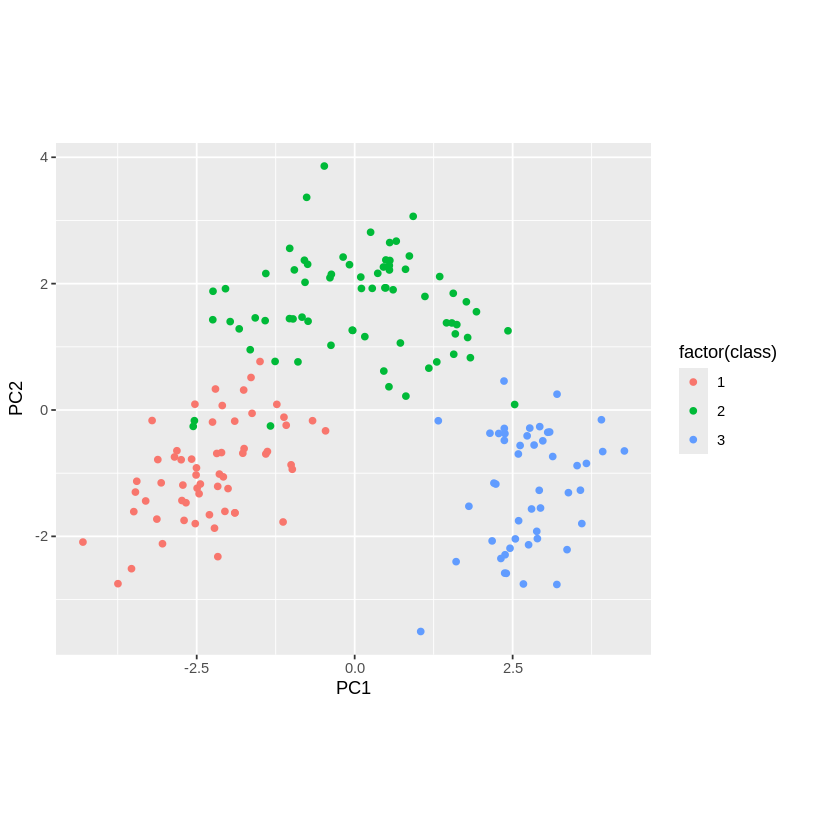

In [ ]:
Rmatrix <- as.data.frame(wine_pca$x)
plot_df <- Rmatrix |>
  select(PC1, PC2) |>
  mutate(class = wine_scaled$class)

print(ggplot(plot_df, aes(PC1, PC2, color = factor(class))) +
  geom_point() +
  coord_fixed())

f)

The PC1 vs. PC2 plot shows three distinct clusters corresponding to the wine factors (classes). Class 1 appears on the lower/left hand side, Class 2 in the middle/top, and Class 3 on the bottom/right. This shows that PCA effectively captures the variance in the dataset such that different wines are related to their perspective class, and in this cass seperable.

g)

When you have bad data. For example, only having one interesting degree of variation. There will be no rotation to separate the two axes, resulting in circular or nonlinear data

h)

 A vector space is a set V along with a field F and it will have the PCA find a rotation which aligns axes of variation with the axes of our coordinate system (linear).
 A manifold is a set which has the property that it resembles a vector space locally.
 T-SNE is an approach based on the idea that the important thing to model in the reduced data set is something like the probability of two points being neighbors. T-SNE handles manifold learning better than PCA or a vector space.

# Question 4

a)

In [ ]:
library(Rtsne)
set.seed(123)

tsne_data <- wine_pca$x[, 1:10] |>
as.data.frame() |>
mutate(class = wine_data$class) |>
distinct()

tsne_print <- Rtsne(tsne_data |>
select(-class), dims = 2, perplexity = 30)

b)

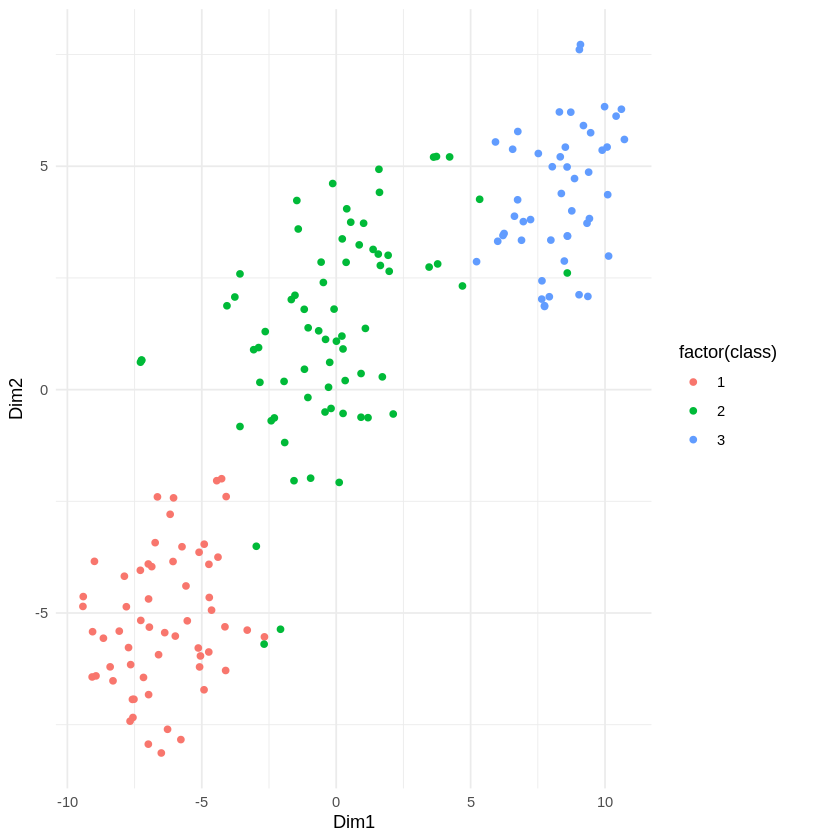

In [ ]:
tsne_df <- as.data.frame(tsne_print$Y) |>
  rename(Dim1 = V1, Dim2 = V2) |>
  mutate(class = tsne_data$class)

ggplot(tsne_df, aes(x = Dim1, y = Dim2, color = factor(class))) +
  geom_point() +
  theme_minimal()

c)

PCA only captures linear variance  and T-SNE captures nonlinear relationships which can reveal clusters PCA misses.

d)

Any data that results in circular or nonlinear structures where T-SNE will capturre anything PCA misses. For example, certain types of health data where the variables are difficult to quantify.